In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_scores = pd.read_csv('/content/scores_data.csv')
df_scores.columns = df_scores.columns.str.strip()
df_scores['Score'] = df_scores['Score'].str.split('/').str[0].astype(int)

In [ ]:
batch_stats = df_scores.groupby('Batch')['Score'].agg(['mean', 'median', 'std', 'count', 'min', 'max']).reset_index()

/tmp/ipython-input-3685217076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Batch', y='mean', data=batch_stats, palette='viridis')


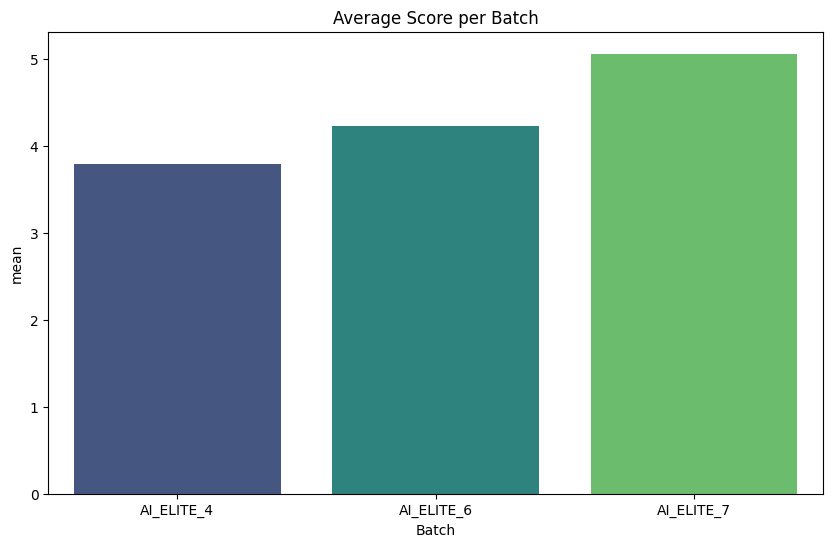

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Batch', y='mean', data=batch_stats, palette='viridis')
plt.title('Average Score per Batch')
plt.savefig('avg_score_per_batch.png')

/tmp/ipython-input-1171427884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Batch', y='Score', data=df_scores, palette='Set2')


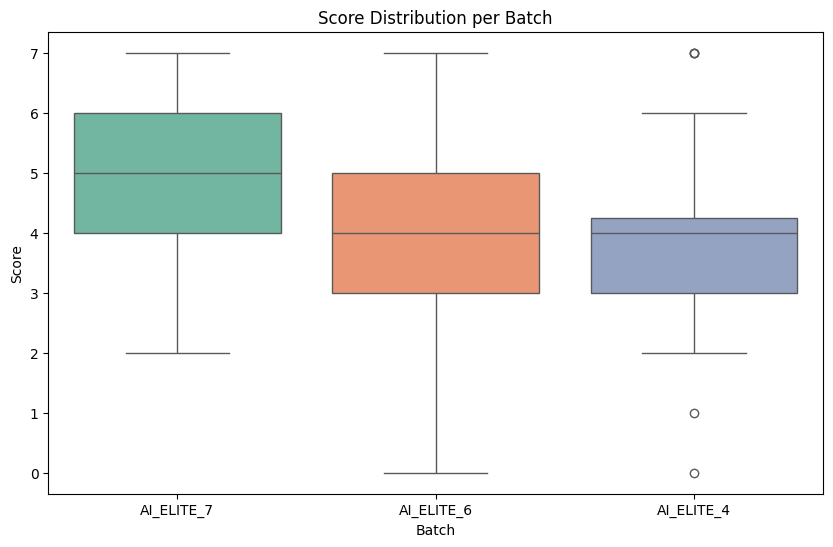

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=df_scores, palette='Set2')
plt.title('Score Distribution per Batch')
plt.savefig('score_distribution_boxplot.png')

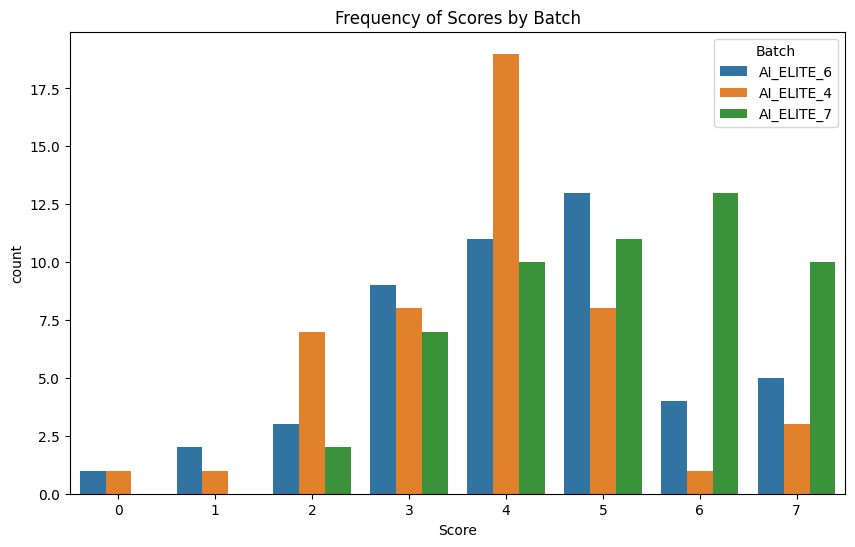

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', hue='Batch', data=df_scores)
plt.title('Frequency of Scores by Batch')
plt.savefig('score_frequency_by_batch.png')

In [ ]:
df_scores['High_Scorer'] = df_scores['Score'] >= 6
df_scores['Low_Scorer'] = df_scores['Score'] <= 2
performance_insights = df_scores.groupby('Batch').agg({
    'High_Scorer': lambda x: (x.sum() / len(x)) * 100,
    'Low_Scorer': lambda x: (x.sum() / len(x)) * 100
}).reset_index()
print(performance_insights)
performance_insights.to_csv('batch_performance_insights.csv', index=False)

        Batch  High_Scorer  Low_Scorer
0  AI_ELITE_4     8.333333   18.750000
1  AI_ELITE_6    18.750000   12.500000
2  AI_ELITE_7    43.396226    3.773585


#  Batch-wise Performance Analysis Report  


## 1️ Executive Summary of Performance

| Batch | Mean Score | Median Score | Std. Deviation | Total Students | Min Score | Max Score |
|------|-----------|-------------|---------------|---------------|-----------|-----------|
| **AI_ELITE_4** | 3.79 | 4.0 | 1.44 | 48 | 0 | 7 |
| **AI_ELITE_6** | 4.23 | 4.0 | 1.64 | 48 | 0 | 7 |
| **AI_ELITE_7** | 5.06 | 5.0 | 1.45 | 53 | 2 | 7 |



## 2️ Key Insights

###  A. Batch AI_ELITE_7 — The Top Performers

- **Performance:**  
  This batch leads with the highest average score of **5.06 / 7**.
- **High Scorers:**  
  Approximately **43.4%** of students scored **6 or 7**, more than double the high-scorer rate of AI_ELITE_6.
- **Consistency:**  
  The minimum score is **2**, indicating that even the lowest-performing students outperform the weakest students in other batches (min = 0).

 *Overall, AI_ELITE_7 demonstrates both high achievement and consistency.*



###  B. Batch AI_ELITE_6 — High Variance Group

- **Performance:**  
  Mid-range performance with an average score of **4.23**.
- **Diversity in Learning Levels:**  
  Highest standard deviation (**1.64**), suggesting a wide gap between strong and weak performers.
- **Score Spread:**  
  - **18.8%** scored very high  
  - **12.5%** scored **2 or below**
- **Potential:**  
  While top students perform well, a sizable portion may require additional academic support.

 *This batch needs targeted intervention rather than uniform teaching.*



###  C. Batch AI_ELITE_4 — The Struggling Batch

- **Performance:**  
  Lowest average score at **3.79**.
- **Low Scorers:**  
  Nearly **19%** of students scored **2 or less**, the highest low-score rate among all batches.
- **High Achievers:**  
  Only **8.3%** managed to score **6 or 7**.
- **Challenge Identified:**  
  The pace or difficulty of the material may be overwhelming for this group.

❗ *AI_ELITE_4 shows clear signs of foundational gaps.*



## 3️ Comparative Visualization Insights

###  Average Scores
- The bar chart **`avg_score_per_batch.png`** shows a **steady upward trend** from AI_ELITE_4 → AI_ELITE_7.

###  Score Distribution
- The boxplot **`score_distribution_boxplot.png`** highlights:
  - Median score of **5.0** for AI_ELITE_7
  - Median score of **4.0** for AI_ELITE_4 and AI_ELITE_6
- The entire distribution of AI_ELITE_7 is shifted higher.

###  Score Frequency
- The frequency plot **`score_frequency_by_batch.png`** shows:
  - AI_ELITE_7 peaks at score **7**
  - AI_ELITE_4 peaks around **3**
  - AI_ELITE_6 peaks around **4**



## 4️ Recommendations

###  For AI_ELITE_4
- Conduct **review sessions** or **foundational workshops**
- Nearly **1 in 5 students** are scoring very low and need immediate academic support

###  For AI_ELITE_6
- Apply **targeted intervention** for the lower-performing half
- Aim to reduce performance variance while supporting high achievers

###  For AI_ELITE_7
- Introduce **advanced or accelerated material**
- This batch is well-prepared for higher-level challenges

##  Conclusion

- **AI_ELITE_7** is excelling and ready for advancement  
- **AI_ELITE_6** has strong potential but needs focused support  
- **AI_ELITE_4** requires immediate academic reinforcement  

 *Strategic, batch-specific interventions will significantly improve overall learning outcomes.*
